In [86]:
#imports and read and clean data

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import preprocessor as p
import geopandas as gp
from collections import Counter
from textblob_de import TextBlobDE as TextBlob
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

de = np.array(Image.open(OUTPUT/  "Mask for Wclouds" / "de.png"))
OUTPUT = Path.cwd().parents[0] / "Output"
df = pd.read_csv(Path.cwd().parents[0]  / "CSV" / "Raw"/ "all_tweets.csv")

def clean_emoji(x):
    if x == '{}':
        return None
    else:
        return x[1:-1]

df['emoji'] = df['emoji'].apply(clean_emoji)
df['hashtags'] = df['hashtags'].apply(lambda x:x[1:-1])
df['post_publish_date'] = pd.to_datetime(df['post_publish_date']) 
df.drop(columns = ['post_guid'],inplace = True)

df['post_language'].value_counts()


en     73282
it     22921
de     19068
fr     15207
und    14256
es      9956
nl      6395
sv      1260
tr      1204
el      1071
da       410
pt       385
in       373
pl       345
fi       318
no       255
ar       249
ca       178
ro       132
eu       124
et       113
cs        84
sl        74
cy        71
tl        66
ht        63
hu        55
ur        54
bg        52
fa        42
lt        41
hi        30
is        29
ru        27
lv        20
ja        19
sr         7
uk         6
vi         3
zh         3
th         1
ps         1
ne         1
sd         1
ta         1
Name: post_language, dtype: int64

In [3]:
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.MENTION)

df_de['post_body'] = df_de['post_body'].apply(p.clean)
df_de

df_de['post_body'] = df_de['post_body'].apply(lambda x : x.replace('#',""))
df_de

In [4]:
def blobber(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity,blob.sentiment.subjectivity

In [5]:
df_de[['polarity','subjectivity']] = df_de['post_body'].apply(blobber).apply(pd.Series)
df_de

/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,polarity,subjectivity
5,7.116587,50.703471,Putin will Soros vor das Gericht? Wusste ich n...,2017-01-18 13:11:25,de,Fluechtlinge,None,0.000000,0.0
93,13.424606,52.506701,Da kaum einer der Refugees Deutschland als Dem...,2017-01-18 21:10:34,de,Refugees,None,0.000000,1.0
102,13.424606,52.506701,Ist es nicht total ironisch das das Land der E...,2017-01-18 23:09:00,de,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,0.150000,0.0
106,9.372680,53.679887,Im a sexy beast immigrant in Deutschlanddd Ger...,2017-01-18 22:58:25,de,"sexy,hot,hamburg,Germany,Immigrants",None,0.000000,0.0
116,8.634500,53.664801,via Neue Ghettos zeichnen sich schon ab. Wenn'...,2017-01-19 06:01:15,de,"Fluechtlinge,Ghettos,Familiennachzug,NO",None,-0.500000,0.0
...,...,...,...,...,...,...,...,...,...
168202,8.024844,50.881366,Nicht vergessen: 1. Siegener Fuball-Tagung am ...,2017-01-18 07:52:35,de,"Migration,FoKoS,Fußball",⚽️,0.116667,0.0
168203,-2.229417,51.853091,"Our MigrationCrisis team reports from Berlin, ...",2017-01-18 07:54:24,de,MigrationCrisis,None,0.000000,0.0
168227,13.424606,52.506701,EU2017MT schliet Trio EU2016NL u EU2016NL 18 l...,2017-01-18 09:35:05,de,"syrien,ebdbrief,Frontex,EU2016NL,Nachbarschaft...",None,0.000000,0.0
168229,10.208418,54.504921,Neuer Seenotrettungskreuzer BERLIN auf Vorstel...,2017-01-18 09:49:28,de,"Seenotretter,BERLIN,kielleuchtturm,Seenotrettu...",None,0.000000,0.0


In [29]:
df_de['Date'] = df_de['post_publish_date'].dt.date
df_de['Month/Year'] = df_de['post_publish_date'].dt.to_period('M')
df_de['Year'] = df_de['post_publish_date'].dt.year
df_de

<ipython-input-29-1eb1e38ec4ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['Date'] = df_de['post_publish_date'].dt.date
<ipython-input-29-1eb1e38ec4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['Month/Year'] = df_de['post_publish_date'].dt.to_period('M')
<ipython-input-29-1eb1e38ec4ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,polarity,subjectivity,Date,Month/Year,Year
5,7.116587,50.703471,Putin will Soros vor das Gericht? Wusste ich n...,2017-01-18 13:11:25,de,Fluechtlinge,None,0.000000,0.0,2017-01-18,2017-01,2017
93,13.424606,52.506701,Da kaum einer der Refugees Deutschland als Dem...,2017-01-18 21:10:34,de,Refugees,None,0.000000,1.0,2017-01-18,2017-01,2017
102,13.424606,52.506701,Ist es nicht total ironisch das das Land der E...,2017-01-18 23:09:00,de,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,0.150000,0.0,2017-01-18,2017-01,2017
106,9.372680,53.679887,Im a sexy beast immigrant in Deutschlanddd Ger...,2017-01-18 22:58:25,de,"sexy,hot,hamburg,Germany,Immigrants",None,0.000000,0.0,2017-01-18,2017-01,2017
116,8.634500,53.664801,via Neue Ghettos zeichnen sich schon ab. Wenn'...,2017-01-19 06:01:15,de,"Fluechtlinge,Ghettos,Familiennachzug,NO",None,-0.500000,0.0,2017-01-19,2017-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
168202,8.024844,50.881366,Nicht vergessen: 1. Siegener Fuball-Tagung am ...,2017-01-18 07:52:35,de,"Migration,FoKoS,Fußball",⚽️,0.116667,0.0,2017-01-18,2017-01,2017
168203,-2.229417,51.853091,"Our MigrationCrisis team reports from Berlin, ...",2017-01-18 07:54:24,de,MigrationCrisis,None,0.000000,0.0,2017-01-18,2017-01,2017
168227,13.424606,52.506701,EU2017MT schliet Trio EU2016NL u EU2016NL 18 l...,2017-01-18 09:35:05,de,"syrien,ebdbrief,Frontex,EU2016NL,Nachbarschaft...",None,0.000000,0.0,2017-01-18,2017-01,2017
168229,10.208418,54.504921,Neuer Seenotrettungskreuzer BERLIN auf Vorstel...,2017-01-18 09:49:28,de,"Seenotretter,BERLIN,kielleuchtturm,Seenotrettu...",None,0.000000,0.0,2017-01-18,2017-01,2017


In [36]:
df_de.set_index('Month/Year',inplace =True)
df_de.index

PeriodIndex(['2017-01', '2017-01', '2017-01', '2017-01', '2017-01', '2017-01',
             '2017-01', '2017-01', '2017-01', '2017-01',
             ...
             '2017-01', '2017-01', '2017-01', '2017-01', '2017-01', '2017-01',
             '2017-01', '2017-01', '2017-01', '2017-01'],
            dtype='period[M]', name='Month/Year', length=19068, freq='M')

In [33]:
type(df_de['Month/Year'].values[0])

pandas._libs.tslibs.period.Period

<AxesSubplot:xlabel='Year', ylabel='polarity'>

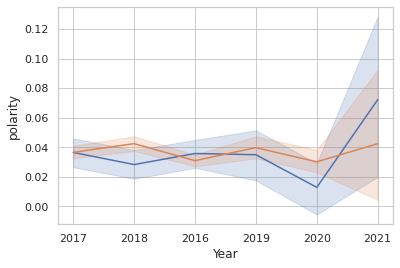

In [26]:
sns.set_theme(style = 'whitegrid')
sns.lineplot(data = df_de, x = 'Year',y ='polarity')
sns.lineplot(data = df_de, x = 'Year',y ='subjectivity')

In [31]:
#count the most common hashtags

results = Counter()
df_de['hashtags'].str.lower().str.split(',').apply(results.update)
print(results.most_common(30))

[('flüchtlinge', 2885), ('refugeeswelcome', 1492), ('migranten', 1342), ('migration', 1101), ('asyl', 861), ('fluechtlinge', 777), ('refugees', 772), ('merkel', 723), ('migrationspakt', 642), ('seebrücke', 576), ('seenotrettung', 503), ('eu', 468), ('deutschland', 464), ('afd', 456), ('berlin', 376), ('seehofer', 371), ('flüchtlingen', 368), ('flüchtling', 356), ('geflüchtete', 349), ('integration', 320), ('abschiebung', 309), ('muslimban', 305), ('moria', 288), ('ausländer', 287), ('asylstreit', 283), ('cdu', 255), ('flüchtlingspolitik', 253), ('csu', 247), ('flüchtlingskrise', 243), ('spd', 232)]


<AxesSubplot:xlabel='Year', ylabel='polarity'>

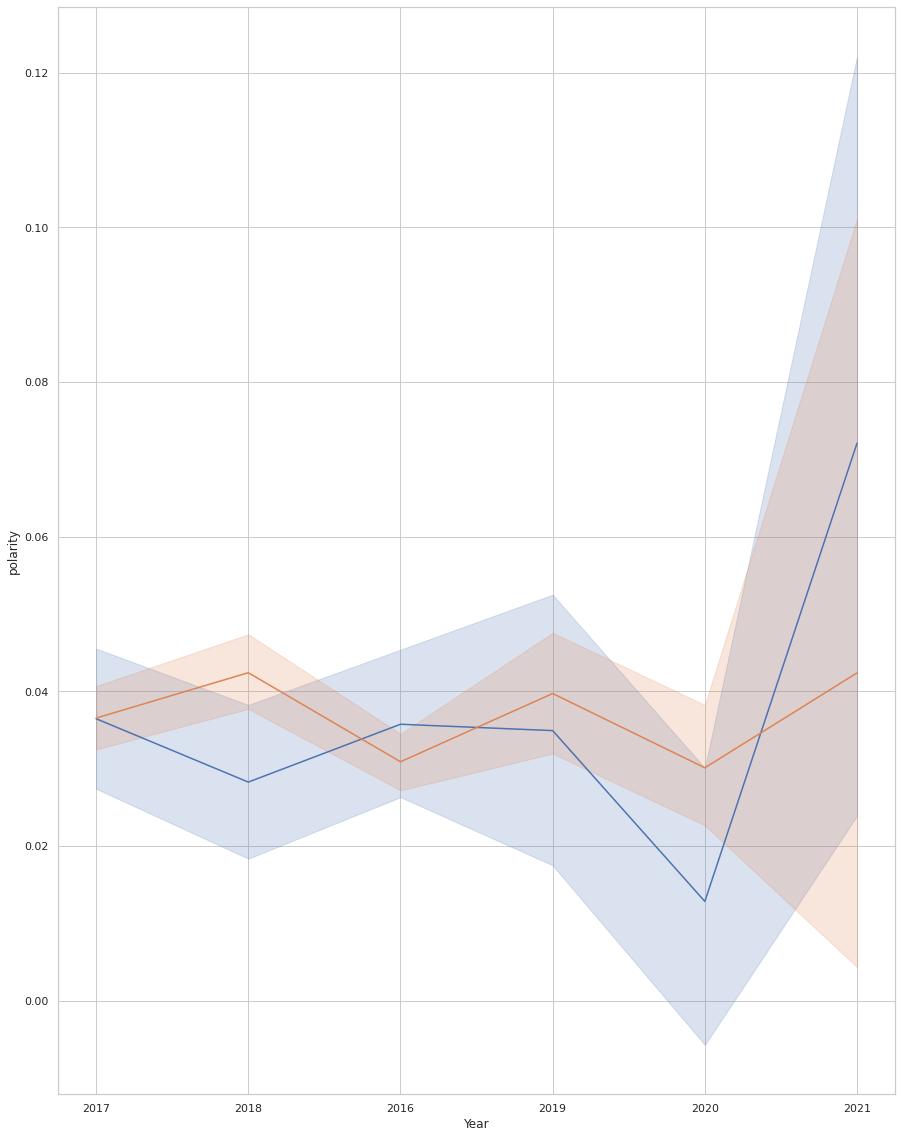

In [56]:
fig,ax = plt.subplots(1,figsize = (15,20))
sns.lineplot(data = df_de, x = 'Year',y ='polarity',ax=ax)
sns.lineplot(data = df_de, x = 'Year',y ='subjectivity',ax =ax)

<AxesSubplot:xlabel='Month/Year'>

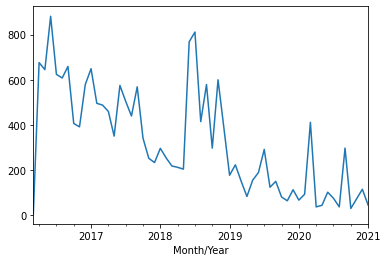

In [7]:
df_de['Month/Year'].groupby(pd.to_datetime(df_de['Month/Year']).dt.to_period("M")).agg('count').plot()

In [8]:
dates = df_de['Date'].groupby(pd.to_datetime(df_de['Date']).dt.to_period("M")).agg('count')
dates = dates.sort_values(ascending =False)
dates.index[:10]


PeriodIndex(['2018-06', '2016-04', '2017-01', '2016-06', '2018-11', '2016-07',
             '2016-09', '2017-06', '2016-05', '2016-08'],
            dtype='period[M]', name='Date', freq='M')

In [34]:
type(dates.index[:10])

pandas.core.indexes.period.PeriodIndex

In [45]:
peak_idx = df_de.index.intersection(dates.index[:10])
peaks = df_de.loc[peak_idx]
peaks

,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,polarity,subjectivity,Date,Year
Month/Year,,,,,,,,,,,
2017-01,7.116587,50.703471,Putin will Soros vor das Gericht? Wusste ich n...,2017-01-18 13:11:25,de,Fluechtlinge,None,0.00,0.0,2017-01-18,2017
2017-01,13.424606,52.506701,Da kaum einer der Refugees Deutschland als Dem...,2017-01-18 21:10:34,de,Refugees,None,0.00,1.0,2017-01-18,2017
2017-01,13.424606,52.506701,Ist es nicht total ironisch das das Land der E...,2017-01-18 23:09:00,de,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,0.15,0.0,2017-01-18,2017
2017-01,9.372680,53.679887,Im a sexy beast immigrant in Deutschlanddd Ger...,2017-01-18 22:58:25,de,"sexy,hot,hamburg,Germany,Immigrants",None,0.00,0.0,2017-01-18,2017
2017-01,8.634500,53.664801,via Neue Ghettos zeichnen sich schon ab. Wenn'...,2017-01-19 06:01:15,de,"Fluechtlinge,Ghettos,Familiennachzug,NO",None,-0.50,0.0,2017-01-19,2017
...,...,...,...,...,...,...,...,...,...,...,...
2016-09,-6.247622,53.354903,Kleine Titten und null Hirn...kotz refugeeswel...,2016-09-30 19:28:18,de,"kotz,refugeeswelcome",None,0.00,0.0,2016-09-30,2016
2016-09,-0.159403,51.542437,Assimilation &amp; the immigration debate. Pro...,2016-09-30 19:29:21,de,"immigration,Politics",None,0.00,0.0,2016-09-30,2016
2016-09,11.541754,48.154879,Experimente auf kosten von Menschen / Fluechtl...,2016-09-30 20:05:18,de,Fluechtlinge,None,-0.50,0.0,2016-09-30,2016


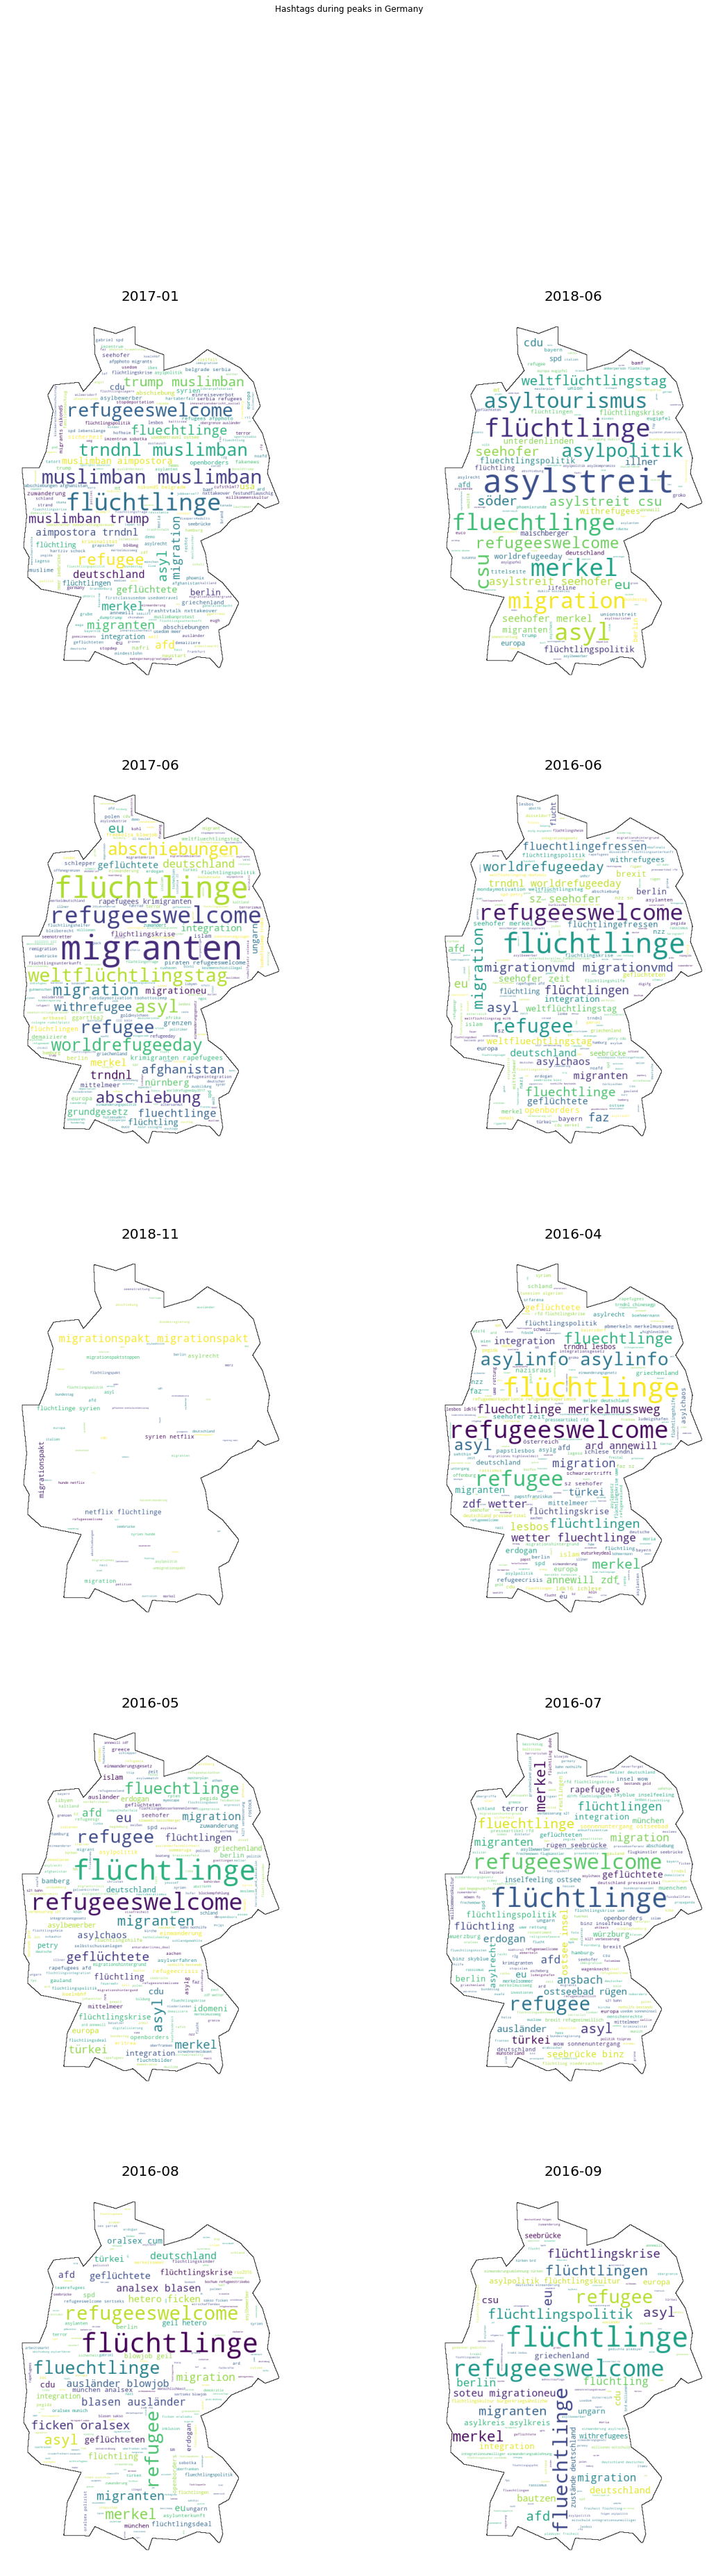

In [82]:
def generate_wordcloud(time):
    newlist =df_de['hashtags'].loc[time]
    foo = []
    for item in newlist:
        foo.append(item.lower().split(','))

    flat_list = [item for sublist in foo for item in sublist]
    #print(flat_list[:10])
    text = " ".join(word for word in flat_list)
    stopwords = set(STOPWORDS)
    
    wordcloud =WordCloud(stopwords=stopwords, 
               background_color="white", 
               width=800, 
               height=400,
               mask= de,
               contour_width=1,
               contour_color='black').generate(text)
    
    return wordcloud

fig = plt.figure(figsize=(20,60))
fig.suptitle('Hashtags during peaks in Germany')

for idx,time in enumerate(peaks.index.unique()):
      
    ax = fig.add_subplot(5,2,idx+1)
    wordcloud = generate_wordcloud(time)
    ax.set_title(time,fontsize =20)
    ax.imshow(wordcloud)
    ax.axis('off')


In [91]:
df_de = df[df['post_language']=='de']

gdf = gp.GeoDataFrame(df_de.drop(columns = ['post_body','post_publish_date']),
                      geometry = gp.points_from_xy(df_de.long, df_de.lat),
                      crs = "epsg:3857"
                     )
gdf



,long,lat,post_language,hashtags,emoji,geometry
5,7.116587,50.703471,de,Fluechtlinge,None,POINT (7.11659 50.70347)
93,13.424606,52.506701,de,Refugees,None,POINT (13.42461 52.50670)
102,13.424606,52.506701,de,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,POINT (13.42461 52.50670)
106,9.372680,53.679887,de,"sexy,hot,hamburg,Germany,Immigrants",None,POINT (9.37268 53.67989)
116,8.634500,53.664801,de,"Fluechtlinge,Ghettos,Familiennachzug,NO",None,POINT (8.63450 53.66480)
...,...,...,...,...,...,...
168202,8.024844,50.881366,de,"Migration,FoKoS,Fußball",⚽️,POINT (8.02484 50.88137)
168203,-2.229417,51.853091,de,MigrationCrisis,None,POINT (-2.22942 51.85309)
168227,13.424606,52.506701,de,"syrien,ebdbrief,Frontex,EU2016NL,Nachbarschaft...",None,POINT (13.42461 52.50670)
168229,10.208418,54.504921,de,"Seenotretter,BERLIN,kielleuchtturm,Seenotrettu...",None,POINT (10.20842 54.50492)
